# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:  Nicole Hansen
GitHub repo: https://github.com/nhansen23/mod7-article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [ ]:
# Install packages
from collections import Counter
import pickle
import requests
import spacy
import spacytextblob
from bs4 import BeautifulSoup
import html5lib
import jupyterlab

print('All prereqs installed.')
!pip list

All prereqs installed.
Package                           Version
--------------------------------- ------------------
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1


aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.2
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data                 0.2024.6.3.0.31.14
asttokens                         2.4.1
async-lru                         2.0.4
atomicwrites                      1.4.0
attrs                             23.1.0
Automat                           20.2.0
autopep8           

## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
# Store url of site
url="https://www.goodreads.com/book/show/4671.The_Great_Gatsby"

try:
    # Fetch the web page
    response = requests.get(url)
    response.raise_for_status() # Check if the request was successful

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Print the content to ensure the content is there
    #print(soup.prettify())
    
    # Extract reviews
    reviews = soup.find_all('section', class_='ReviewText')

    # Print the number of reviews found
    print(f"Number of reviews found: {len(reviews)}")

    # Extract text content from reviews
    review_text = [review.get_text(strip=True) for review in reviews]

    # Write the content to a file
    with open('reviews.pkl', 'wb') as file:
        pickle.dump(review_text, file)
    print(f"Reviews have been written to reviews.pkl")

except requests.exceptions.RequestException as e:
    print("Failed to retrieve review content: {3}")

Number of reviews found: 30
Reviews have been written to reviews.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [24]:
import pickle
from bs4 import BeautifulSoup
from textblob import TextBlob

file_name = 'reviews.pkl'

# Load the file
with open(file_name, 'rb') as file:
    loaded_reviews = pickle.load(file)

# Perform sentiment analysis on the reivews
#for review_text in loaded_reviews[:10]:
#    analysis = TextBlob(review_text)
#    sentiment = analysis.sentiment
#    print(f"Review: {review_text}")
    #print(f"Sentiment: {sentiment}\n")
#    print(f"Polarity: {sentiment.polarity}\n")

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

analysis = TextBlob(review_text)
sentiment = analysis.sentiment
print(f"The article polarity score is: {sentiment.polarity}")

num_sentences = len(list(doc.sents))
print(f"The number of sentences in the article is {num_sentences}\n")

The article polarity score is: 0.10205492424242428
The number of sentences in the article is 22



3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [5]:
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# Filter out punctuation and stop words
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each token 
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("The 5 most frequent tokens are:")
for token, freq in most_common_tokens:
    print(f"Token: {token} - Frequency: {freq}")

The 5 most frequent tokens are:
Token: people - Frequency: 7
Token: gatsby - Frequency: 6
Token: great - Frequency: 5
Token: fitzgerald - Frequency: 5
Token: world - Frequency: 4


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [6]:
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# Filter out punctuation and stop words
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each lemma 
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("The 5 most frequent lemmas are:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma} - Frequency: {freq}")

The 5 most frequent lemmas are:
Lemma: people - Frequency: 7
Lemma: great - Frequency: 6
Lemma: gatsby - Frequency: 6
Lemma: light - Frequency: 5
Lemma: fitzgerald - Frequency: 5


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Polarity scores: [0.325, 0.28102678571428574, 0.11631493506493507, 0.22500000000000003, -0.07813852813852813, 0.13999999999999999, 0.013333333333333341, 0.0921875, 0.16354166666666667, 0.29464285714285715]


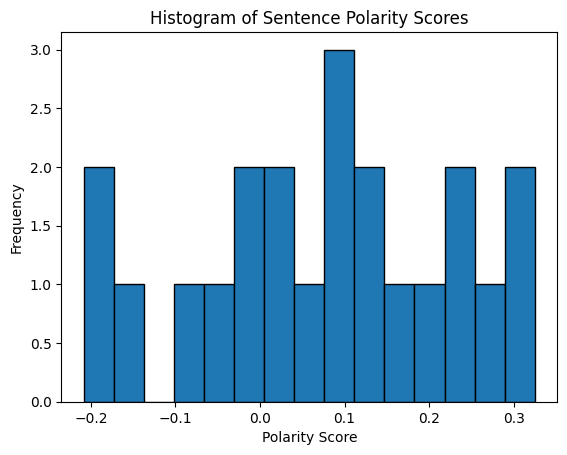

Min: -0.20833333333333331
Max: 0.325
Number of Scores: 22


In [15]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# List to store polarity scores
polarity_scores = []

# Perform sentiment analysis on each sentence and collect polarity scores
for sentence in doc.sents:
    # Join tokens to form the sentence text
    sentence_text = ' '.join([token.text for token in sentence])
    analysis = TextBlob(sentence.text)
    polarity_scores.append(analysis.sentiment.polarity)

# Print the first few polarity scores to check
print(f"Polarity scores: {polarity_scores[:10]}")

# Plot histogram of the polarity scores
plt.hist(polarity_scores, bins=15, edgecolor='k')
plt.title('Histogram of Sentence Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
#plt.bar_label()
plt.show()

print(f"Min: {min(polarity_scores)}")
print(f"Max: {max(polarity_scores)}")
print(f"Number of Scores: {len(polarity_scores)}")

# The most common score is 0.05 to 0.15

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Polarity scores: [0.325, 0.28102678571428574, 0.11631493506493507, 0.22500000000000003, -0.07813852813852813, 0.13999999999999999, 0.013333333333333341, 0.0921875, 0.16354166666666667, 0.29464285714285715]


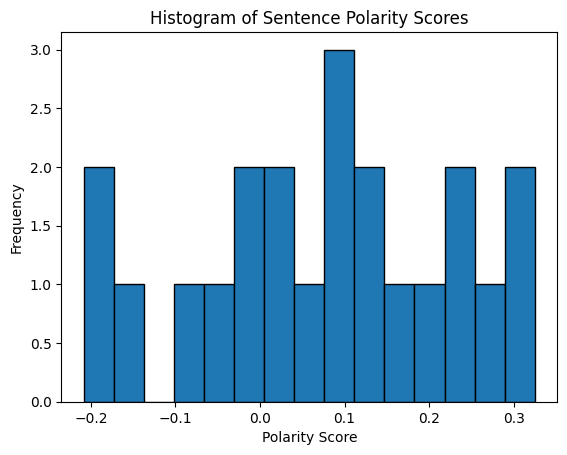

Min: -0.20833333333333331
Max: 0.325
Number of Scores: 22


In [14]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# List to store polarity scores
polarity_scores = []

# Perform sentiment analysis on each sentence and collect polarity scores
for sentence in doc.sents:
    # Join tokens to form the sentence text
    sentence_text = ' '.join([lemma.text for lemma in sentence])
    analysis = TextBlob(sentence.text)
    polarity_scores.append(analysis.sentiment.polarity)

# Print the first few polarity scores to check
print(f"Polarity scores: {polarity_scores[:10]}")

# Plot histogram of the polarity scores
plt.hist(polarity_scores, bins=15, edgecolor='k')
plt.title('Histogram of Sentence Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

print(f"Min: {min(polarity_scores)}")
print(f"Max: {max(polarity_scores)}")
print(f"Number of Scores: {len(polarity_scores)}")

# The most common score is 0.05 to 0.15

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.0
* Cutoff Score (lemmas): 0.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [31]:
import spacy 
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# List to store sentences with polarity scores greater than the cutoff
summary_sentences = []

# Store cutoff score
cutoff_score = 0.0

# Perform sentiment analysis on each sentence 
for sent in doc.sents:
    # Join tokens to form the sentence text 
    sentence_text = ' '.join([token.text for token in sent])
    analysis = TextBlob(sentence_text)
    if analysis.sentiment.polarity > cutoff_score:
        summary_sentences.append(sent.text.strip())

# Print the summary
summary = ' '.join(summary_sentences)
print(f"Summary: \n{summary}")

Summary: 
Bright lights, big cityWhen I avowed my disenchantment withTender Is the Night, a few GR friends urged me to readThe Great Gatsbyto truly appreciate F. Scott Fitzgerald. I cannot but admitThe Great Gatsbywas a far more exhilarating read than I had expected it to be, its tight composition and restless pace a remarkable contrast with the muddled slow mess that madeTender Is the Nighthard for me to get through, the exquisite, visual opulent writing more than inThe Curious Case of Benjamin Buttonunfurling in all its grandeur, alternating the scrumptious and the gritty, just like the narrative unfolding more coherently. ReadingThe Great Gatsbyimmediately afterTra donne sole(among women only) byCesare Pavese, featuring also some bored socialites as seen by an outsider who almost unwillingly turns into an insider, it struck me how little difference living in 1922 New York or fifties Turin seemed to make, at least for a certain class of people, the ones leisured and wealthy – however

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [32]:
# Calculate the polarity score of the summary
summary_analysis = TextBlob(summary)
summary_polarity = summary_analysis.sentiment.polarity

# Print the polarity score of the summary
print(f"Summary Polarity Score: {summary_polarity}")

# Process the summary text to count the sentences
summary_doc = nlp(summary)
num_summary_sentences = len(list(summary_doc.sents))

# Print the number of sentences in the summary
print(f"Number of sentences in the summary: {num_summary_sentences}")

Summary Polarity Score: 0.15680646672914722
Number of sentences in the summary: 15


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [27]:
import spacy 
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text content
doc = nlp(review_text)

# List to store sentences with polarity scores greater than the cutoff
summary_sentences = []

# Store cutoff score
cutoff_score = 0.05

# Perform sentiment analysis on each sentence 
for sent in doc.sents:
    # Join tokens to form the sentence text 
    sentence_text = ' '.join([lemma.text for lemma in sent])
    analysis = TextBlob(sentence_text)
    if analysis.sentiment.polarity > cutoff_score:
        summary_sentences.append(sent.text.strip())

# Print the summary
summary = ' '.join(summary_sentences)
print(f"Summary: \n{summary}")

Summary: 
Bright lights, big cityWhen I avowed my disenchantment withTender Is the Night, a few GR friends urged me to readThe Great Gatsbyto truly appreciate F. Scott Fitzgerald. I cannot but admitThe Great Gatsbywas a far more exhilarating read than I had expected it to be, its tight composition and restless pace a remarkable contrast with the muddled slow mess that madeTender Is the Nighthard for me to get through, the exquisite, visual opulent writing more than inThe Curious Case of Benjamin Buttonunfurling in all its grandeur, alternating the scrumptious and the gritty, just like the narrative unfolding more coherently. ReadingThe Great Gatsbyimmediately afterTra donne sole(among women only) byCesare Pavese, featuring also some bored socialites as seen by an outsider who almost unwillingly turns into an insider, it struck me how little difference living in 1922 New York or fifties Turin seemed to make, at least for a certain class of people, the ones leisured and wealthy – however

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [28]:
# Calculate the polarity score of the summary
summary_analysis = TextBlob(summary)
summary_polarity = summary_analysis.sentiment.polarity

# Print the polarity score of the summary
print(f"Summary Polarity Score: {summary_polarity}")

# Process the summary text to count the sentences
summary_doc = nlp(summary)
num_summary_sentences = len(list(summary_doc.sents))

# Print the number of sentences in the summary
print(f"Number of sentences in the summary: {num_summary_sentences}")

Summary Polarity Score: 0.17329763148728675
Number of sentences in the summary: 13


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell. 

There is a slight difference between the polarity scores of the article as a whole compared to the polarity scores of the summary.  The summary polarity score of 0.157 is slightly higher than the article polarity score of 0.102. I believe in general, all the reviews would be similar in this case. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

There wasn't much of a difference between the scores.  Maybe if a more controversial book was chosen, there would be a greater discrepancy in the reviews of the book.  Going with a classic, I am guessing most of the reviews were favorable or positive.

Convert to HTML

In [33]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] Writing 284128 bytes to article-summarizer.html
